# Total flow plot

Make a plot of total flow before and after the pandemic.

In [1]:
using Plots
using DataFrames
using StatsBase
using Printf


In [2]:
include("../code/KFactors.jl")
using .KFactors

In [3]:
const UNC_BLUE = RGB(75/255, 156/255, 211/255)

In [4]:
data = read_data("../data/all_district_peaks.parquet", "../data/sensor_meta_geo.csv")

┌ Info: Observations in each period
│   combine(groupby(data, :period), nrow) = 3×2 DataFrame
 Row │ period        nrow    
     │ Cat…          Int64   
─────┼───────────────────────
   1 │ pandemic       365083
   2 │ postpandemic   338894
   3 │ prepandemic   1371886
└ @ Main.KFactors /Users/mwbc/git/peak-spreading/code/KFactors.jl:87
┌ Info: Before filtering, data has 2075863 rows
└ @ Main.KFactors /Users/mwbc/git/peak-spreading/code/KFactors.jl:98
┌ Info: After filtering, data has 971707 rows
└ @ Main.KFactors /Users/mwbc/git/peak-spreading/code/KFactors.jl:120


,station,peak_hour_occ,occ_entropy,total_occ,total_flow,station_type,freeway_number
,Int64?,Float64?,Float64?,Float64?,Int64?,String?,Int64?
1,312010,0.0993812,5.47138,30.0741,124445,ML,50
2,312098,0.196265,5.27631,16.2056,76301,ML,50
3,312103,0.10535,5.38137,26.3512,108967,ML,50
4,312132,0.0794718,5.5217,12.987,27555,ML,5
5,312133,0.250706,5.21355,17.1021,39827,ML,5
6,312134,0.128285,5.48288,21.2293,37094,ML,5
7,312139,0.105051,5.42806,28.2015,129293,ML,50
8,312326,0.074277,5.473,13.1804,34305,ML,80
9,312346,0.0796166,5.47493,15.2732,65477,ML,80


In [5]:
data = data[data.period .!= :pandemic, :]

,station,peak_hour_occ,occ_entropy,total_occ,total_flow,station_type,freeway_number
,Int64?,Float64?,Float64?,Float64?,Int64?,String?,Int64?
1,312010,0.0993812,5.47138,30.0741,124445,ML,50
2,312098,0.196265,5.27631,16.2056,76301,ML,50
3,312103,0.10535,5.38137,26.3512,108967,ML,50
4,312132,0.0794718,5.5217,12.987,27555,ML,5
5,312133,0.250706,5.21355,17.1021,39827,ML,5
6,312134,0.128285,5.48288,21.2293,37094,ML,5
7,312139,0.105051,5.42806,28.2015,129293,ML,50
8,312326,0.074277,5.473,13.1804,34305,ML,80
9,312346,0.0796166,5.47493,15.2732,65477,ML,80


In [6]:
# create the sensor means pre and post pandemic
sensor_mean_flow = combine(groupby(data, [:station, :period]), :total_flow => mean)
sensor_mean_flow = unstack(sensor_mean_flow, :station, :period, :total_flow_mean)
nothing

In [7]:
sensor_mean_flow.change_prepost = sensor_mean_flow.postpandemic .- sensor_mean_flow.prepandemic
sensor_mean_flow.rel_change_prepost = sensor_mean_flow.change_prepost ./ sensor_mean_flow.prepandemic .* 100
nothing

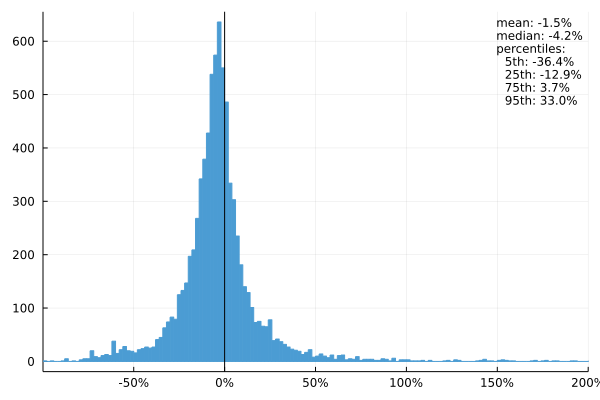

In [8]:
complete = collect(skipmissing(sensor_mean_flow.rel_change_prepost))
histogram(complete,
    xlim = (min(complete...), 200), legend=false, fill=UNC_BLUE, line=UNC_BLUE)#, xlab="Change in mean vehicles per day, pre- to post-pandemic, by sensor")
vline!([0], color=:black)
plot!(xformatter=(x -> @sprintf "%d%%" x))
annotate!(
    (150, 550, text(@sprintf("""
mean: %.1f%%
median: %.1f%%
percentiles:
  5th: %.1f%%
  25th: %.1f%%
  75th: %.1f%%
  95th: %.1f%%
            """, mean(complete), percentile(complete, [50, 5, 25, 75, 95])...), halign=:left, pointsize=8))
    )
savefig("../fig/flow_change.pdf")
plot!()